In [ ]:
######################################################################################################
# ALUNO : Isabela Assis Cardoso
# MATRÍCULA : 2017019091
# TURMA : TM
######################################################################################################

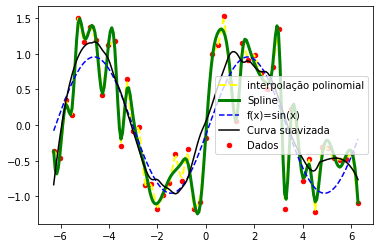

In [4]:
# Atividade 1 - Para a função y = a * sin(b*x + c) faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter


def f(x,a,b,c):
    return a*np.sin(b*x+c)

x = np.linspace(-2*np.pi, 2*np.pi, 51)
y = f(x, 1, 1, 0)

ruido = 0.5*np.random.normal(size=y.size)

y += ruido

#Spline
spl = UnivariateSpline(x, y)

xn = np.linspace(-2*np.pi, 2*np.pi, 200)

spl.set_smoothing_factor(0.8)

#sav gol
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 51, 3
yy_sg = savgol_filter(itp(xn), window_size, poly_order)


#ajuste da curva
fit, _ = curve_fit(f, x, y)
yy_fit = f(xn, *fit)



#plots

fig, ax = plt.subplots()
ax.scatter(x, y, s=20, color='r', label='Dados')

ax.plot(xn, itp(xn), linestyle='--', linewidth=2, color='yellow', label='interpolação polinomial')

ax.plot(xn, spl(xn), 'g', lw = 3, label = 'Spline')

ax.plot(xn, yy_fit, 'b--', label='f(x)=sin(x)')
ax.plot(xn, yy_sg, 'k', label= "Curva suavizada")

plt.legend(loc='best')

plt.show()


#Discussão: O ajuste Univariate Spline parece seguir de maneira semelhante ao comportamento da função, melhor do
#que a interpolação polinomial, porém,com alguns desvios que podem levar a erros na análise dos dados. 
#Ao suavizá-la pelo método de savitz golay, pode-se notar que a curva acompanha muito melhor a função esperada,
#possibilitanto melhores análises dos dados obtidos.

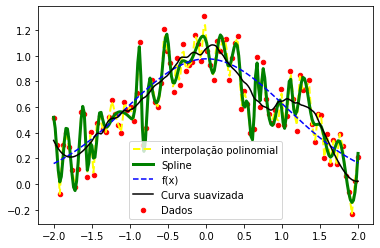

In [12]:
# Atividade 2 - Para uma função gaussiana faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter


def f(x,a, b, c):
    return a*np.exp(-(x-b)**2/(2*(c**2)))
x = np.linspace(-2, 2, 100)
y = f(x,1, 0, 1)

ruido = 0.2*np.random.normal(size=y.size)

y += ruido

#Spline
spl = UnivariateSpline(x, y)

xn = np.linspace(-2, 2, 200)

spl.set_smoothing_factor(0.8)

#sav gol
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 51, 3
yy_sg = savgol_filter(itp(xn), window_size, poly_order)


#ajuste da curva
fit, _ = curve_fit(f, x, y)
yy_fit = f(xn, *fit)



#plots

fig, ax = plt.subplots()
ax.scatter(x, y, s=20, color='r', label='Dados')

ax.plot(xn, itp(xn), linestyle='--', linewidth=2, color='yellow', label='interpolação polinomial')

ax.plot(xn, spl(xn), 'g', lw = 3, label = 'Spline')

ax.plot(xn, yy_fit, 'b--', label='f(x)')
ax.plot(xn, yy_sg, 'k', label= "Curva suavizada")

plt.legend(loc='best')

plt.show()

#Discussão: No caso, a curva estudada foi uma curva do tipo gaussiana. Mais uma vez, pode-se ver que após a suaviza-
#ção pelo método de Savitz Golay, a curva se assemelha muito mais ao comportamento esperado da função, permitindo
#que os dados sejam melhor estudados e que uma descrição matemática do fenômeno seja melhor alcançada.

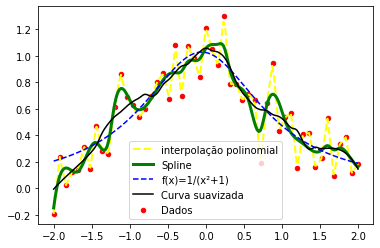

In [11]:
# Atividade 3 - Para uma função lorentziana faça
# (a) gere um conjunto de dados incluindo ruído;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados


import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter


def f(x,a,b,c):
    return  a/((x - b)**2+c)

x = np.linspace(-2, 2, 51)
y = f(x, 1, 0, 1)

ruido = 0.2*np.random.normal(size=y.size)

y += ruido

#Spline
spl = UnivariateSpline(x, y)

xn = np.linspace(-2, 2, 200)

spl.set_smoothing_factor(0.8)

#sav gol
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 51, 3
yy_sg = savgol_filter(itp(xn), window_size, poly_order)


#ajuste da curva
fit, _ = curve_fit(f, x, y)
yy_fit = f(xn, *fit)



#plots

fig, ax = plt.subplots()
ax.scatter(x, y, s=20, color='r', label='Dados')

ax.plot(xn, itp(xn), linestyle='--', linewidth=2, color='yellow', label='interpolação polinomial')

ax.plot(xn, spl(xn), 'g', lw = 3, label = 'Spline')

ax.plot(xn, yy_fit, 'b--', label='f(x)=1/(x²+1)')
ax.plot(xn, yy_sg, 'k', label= "Curva suavizada")

plt.legend(loc='best')

plt.show()


#Discussão: Neste caso, a função estudada foi a função lorentziana f(x)=1/(x²+1), como no caso anterior, os ajustes
#polinomial e cubic spline apresentaram alguns desvios maiores da função, porém, ao serem suavizados pelo método 
#de savitz golay, a curva seguiu de maneira mais próxima o comportamento real de uma lorentziana, se provando uma
#curva melhor para a análise dos dados.

In [6]:
# Atividade 4 - Para o conjunto de dados fornecido abaixo faça:
# (a) leia o conjunto de dados fornecido abaixo;
# (b) suavização tipo "cubic spline";
# (c) suavização tipo Savitz Golay;
# (d) interpolação polinomial;
# (e) ajuste de curva;
# (f) faça um gráfico único com todos os dados dos itens (a) até (e)
# (g) faça uma discussão dos resultados;
# Faça a discussão dos resultados

###############################################################
# Aqui você pode ler os dados de um arquivo ou declará-los
#
#  Arquivo de dados
   X         Y
   0.15000   0.88074
   0.45000  -0.27343
   0.60000   0.20726
   0.75000  -0.01649
   0.90000  -0.28865
   1.05000  -0.29876
   1.15000  -0.55483
   1.35000  -0.14270
   1.50000   0.23730
   1.65000   0.64194
   1.77000   0.70322
   1.95000   0.89408
   2.10000   0.55641
   2.25000   0.54948
   2.40000   0.75237
   2.55000   0.65511
   2.70000   0.68235
   2.85000   0.63281
   3.00000   0.53248
   3.15000   0.50083
   3.30000   0.42535
   3.45000   0.30699
   3.60000   0.21694
   3.75000   0.69009
   3.90000   0.82114
   4.05000   0.87351
   4.20000   0.96497
   4.35000   0.82450
   4.50000   0.45236
   4.65000   0.25863
   4.80000   0.33738
   4.95000   0.66538
   5.10000   0.45252
   5.25000   0.12255
   5.40000   0.88680
   5.55000   0.86841
   5.70000   0.16588
   5.85000   0.87785
   6.10000   0.42957
   6.15000   0.10375
   6.30000   0.55851
   6.45000   0.98703
   6.60000   0.75136
   6.75000   0.39453
   6.90000   0.92825
   7.05000   0.01087
   7.10000   0.24566
   7.35000   0.08873
   7.50000   0.05992
   7.65000   0.38077
   7.80000   0.13342
   7.95000   0.13246
   8.10000   0.95714
   8.25000   0.22580
   8.40000   0.25862
   8.55000   0.56299
   8.70000   0.23621
   8.85000   0.51565
   9.00000   0.21283
   9.15000   0.00997
   9.30000   0.95753
   9.39000   0.16447
   9.75000   0.45849
   9.90000   0.09871
  10.05000   0.01744
  10.20000   0.54524
  10.35000   0.65995
  10.50000   0.59095
  10.65000   0.05585
  10.80000   0.24324
  10.95000   0.80386
  11.10000   0.22294
  11.25000   0.82716
  11.40000   0.57150
  11.55000   0.45607
  11.85000   0.18047
  12.00000   0.99162
  12.15000   0.09803
  12.38000   0.91456
  12.45000   0.91254
  12.60000   0.19791
  12.75000   0.53686
  12.90000   0.75798
  13.05000   0.50550
  13.20000   0.96838
  13.35000   0.44115
  13.50000   0.34072
  13.65000   0.98092
  13.80000   0.33266
  13.95000   0.53988
  14.10000   0.89722
  14.25000   0.15455
  14.30000   0.16139
  14.55000   0.32429
  14.70000   0.63791
  14.85000   0.81178
  15.30000   0.06709



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 81)

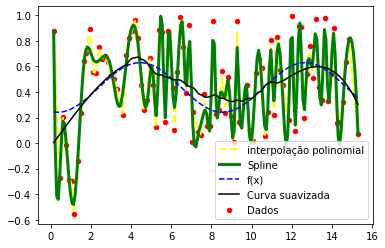

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.interpolate import UnivariateSpline, interp1d
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter


def f(x, a, b, c, d):
    return a+b*np.sin(c*x+d)

x = np.array([0.15, 0.45, 0.6, 0.75, 0.9, 1.05, 1.15, 1.35, 1.5, 1.65, 1.77, 1.95, 2.1, 2.25, 2.4, 2.55, 2.7, 2.85, 3.0, 3.15, 3.3, 3.45, 3.6, 3.75, 3.9, 4.05, 4.2, 4.35, 4.5, 4.65, 4.8, 4.95, 5.1, 5.25, 5.4, 5.55, 5.7, 5.85, 6.1, 6.15, 6.3, 6.45, 6.6, 6.75, 6.9, 7.05, 7.1, 7.35, 7.5, 7.65, 7.8, 7.95, 8.1, 8.25, 8.4, 8.55, 8.7, 8.85, 9.0, 9.15, 9.3, 9.39, 9.75, 9.9, 10.05, 10.2, 10.35, 10.5, 10.65, 10.8, 10.95, 11.1, 11.25, 11.4, 11.55, 11.85, 12.0, 12.15, 12.38, 12.45, 12.6, 12.75, 12.9, 13.05, 13.2, 13.35, 13.5, 13.65, 13.8, 13.95, 14.1, 14.25, 14.3, 14.55, 14.7, 14.85, 15.3])
y = np.array([0.88074,-0.27343, 0.20726,-0.01649,-0.28865,-0.29876,-0.55483,-0.14270,0.23730, 0.64194,0.70322,0.89408,0.55641,0.54948,0.75237,0.65511,0.68235,0.63281,0.53248,0.50083,0.42535,0.30699,0.21694,0.69009,0.82114,0.87351,0.96497, 0.82450,0.45236,0.25863,0.33738,0.66538,0.45252,0.12255,0.88680,0.86841, 0.16588,0.87785,0.42957,0.10375,0.55851,0.98703,0.75136,0.39453,0.92825,0.01087, 0.24566,0.08873,0.05992,0.38077,0.13342,0.13246,0.95714,0.22580, 0.25862, 0.56299,0.23621,0.51565, 0.21283,0.00997, 0.95753,0.16447, 0.45849,0.09871,0.01744, 0.54524,0.65995,0.59095,0.05585,0.24324,0.80386, 0.22294,0.82716,0.57150,0.45607,0.18047,0.99162,0.09803,0.91456, 0.91254, 0.19791, 0.53686,0.75798,0.50550,0.96838,0.44115,0.34072,0.98092, 0.33266,0.53988,0.89722,0.15455,0.16139,0.32429,0.63791,0.81178,0.06709])

#Spline
spl = UnivariateSpline(x, y)

xn = np.linspace(x.min(),x.max(), 200)

spl.set_smoothing_factor(0.8)

#sav gol
itp = interp1d(x,y, kind='linear')
window_size, poly_order = 97, 3
yy_sg = savgol_filter(itp(xn), window_size, poly_order)


#ajuste da curva
fit, _ = curve_fit(f, x, y)
yy_fit = f(xn, *fit)



#plots

fig, ax = plt.subplots()
ax.scatter(x, y, s=20, color='r', label='Dados')

ax.plot(xn, itp(xn), linestyle='--', linewidth=2, color='yellow', label='interpolação polinomial')

ax.plot(xn, spl(xn), 'g', lw = 3, label = 'Spline')

ax.plot(xn, yy_fit, 'b--', label='f(x)')
ax.plot(xn, yy_sg, 'k', label= "Curva suavizada")

plt.legend(loc='best')

plt.show()




#Discussão: Nesta atividade, foi lido um conjunto de valores de um arquivo(eu criei manualmente o array, mas por 
#não saber como funciona a leitura de arquivos dentro do jupyter notebook, estou acostumado a utilizar o vim e 
#nele saberia utilizar uma estrutura de leitura de arquivos para extrair os dados para um array) que então foram
#ajustados e suavizados pelo método de Savitz Golay, e então, a partir do estudo da forma desta suavização, foi ajus-
#tado uma função do tipo seno, com uma proximidade razoavelmente boa da curva suavizada, sendo um indicativo de que
#a função se comporta como um seno.